Automating Crypto Website API Pull

In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '60d24b76-17d9-4cc6-8320-fcb76b2d9b50',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-03-15T09:25:30.655Z', 'error_code': 0, 'error_message': None, 'elapsed': 35, 'credit_count': 1, 'notice': None, 'total_count': 9033}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10091, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
type(data)

dict

In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)

Normalizing the json data to make it more comprehensible.

In [5]:
df = pd.json_normalize(data['data'])
df['Timestamp'] = pd.to_datetime('now')

C:\Users\Archmdz\AppData\Local\Temp\ipykernel_2504\1347525062.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['Timestamp'] = pd.to_datetime('now')


In [6]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10091,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.931805e+07,1.931805e+07,NaN,1,None,None,None,2023-03-15T09:23:00.000Z,24871.475567,5.266243e+10,10.8044,-0.410130,2.306908,12.977579,15.298795,21.510012,40.661901,4.804684e+11,43.7503,5.223010e+11,None,2023-03-15T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 09:25:37.033546
1,1027,Ethereum,ETH,ethereum,6576,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,None,None,None,2023-03-15T09:23:00.000Z,1704.881750,1.557229e+10,10.4976,-0.336524,2.036198,9.735497,14.776024,11.749600,32.366696,2.086330e+11,18.9976,2.086330e+11,None,2023-03-15T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 09:25:37.033546
2,825,Tether,USDT,tether,49389,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.339871e+10,7.314177e+10,NaN,3,None,None,None,2023-03-15T09:23:00.000Z,1.004584,7.349778e+10,11.7515,0.024982,0.045311,0.458347,0.362496,0.432598,0.440581,7.373515e+10,6.7140,7.347703e+10,None,2023-03-15T09:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-15 09:25:37.033546
3,1839,BNB,BNB,bnb,1214,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578921e+08,1.599800e+08,NaN,4,None,None,None,2023-03-15T09:23:00.000Z,312.268604,8.320123e+08,6.4494,-0.374877,2.460125,8.828595,7.522719,3.363446,17.186528,4.930475e+10,4.4902,4.995672e+10,None,2023-03-15T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 09:25:37.033546
4,3408,USD Coin,USDC,usd-coin,10730,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.842625e+10,3.842625e+10,NaN,5,None,None,None,2023-03-15T09:23:00.000Z,0.999295,7.869877e+09,4.8150,0.031836,0.073907,-0.068174,-0.021598,-0.009485,-0.078931,3.839917e+10,3.4970,3.839917e+10,None,2023-03-15T09:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-15 09:25:37.033546
5,52,XRP,XRP,xrp,903,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,None,None,None,2023-03-15T09:23:00.000Z,0.373664,1.385882e+09,-5.4393,-0.442306,1.607228,-1.701943,2.053837,-3.791505,-1.817280,1.903852e+10,1.7338,3.736640e+10,None,2023-03-15T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 09:25:37.033546
6,2010,Cardano,ADA,cardano,678,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.470221e+10,3.557370e+10,NaN,7,None,None,None,2023-03-15T09:23:00.000Z,0.343540,6.312714e+08,22.5665,-0.476603,0.753029,5.891646,-1.765731,0.141481,13.682668,1.192160e+10,1.0855,1.545930e+10,None,2023-03-15T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 09:25:37.033546
7,3890,Polygon,MATIC,polygon,611,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,8,None,None,None,2023-03-15T09:23:00.000Z,1.221339,9.636112e+08,6.9521,-0.713089,5.916969,9.004819,4.209688,25.913426,35.827135,1.066756e+10,0.9714,1.221339e+10,None,2023-03-15T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 09:25:37.033546
8,74,Dogecoin,DOGE,dogecoin,657,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,9,None,None,None,2023-

Automating the API and importing it to an excel file.

In [7]:
import os
from time import time, sleep

In [8]:
def api_runner():
  global df
  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
    }
  headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '60d24b76-17d9-4cc6-8320-fcb76b2d9b50',
    }

  session = Session()
  session.headers.update(headers)

  try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print(data)
  except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        
        
df = pd.json_normalize(data['data'])
df['Timestamp'] = pd.to_datetime('now')

if not os.path.isfile(r'C:\Users\Archmdz\Desktop\Prog\For Portfolio\API Pull Script\API.csv'):
    df.to_csv(r'C:\Users\Archmdz\Desktop\Prog\For Portfolio\API Pull Script\API.csv', header='Column_Names')
else:
    df.to_csv(r'C:\Users\Archmdz\Desktop\Prog\For Portfolio\API Pull Script\API.csv', mode= 'a',header=False)

C:\Users\Archmdz\AppData\Local\Temp\ipykernel_2504\1860609592.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['Timestamp'] = pd.to_datetime('now')


In [9]:
df = df.append(df)

C:\Users\Archmdz\AppData\Local\Temp\ipykernel_2504\2831408468.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df)


In [10]:
for i in range(5):
    api_runner()
    print('API Runner ran successfully!')
    sleep(60) #Adding 1 minute intervals
exit()

{'status': {'timestamp': '2023-03-15T09:25:36.585Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 9033}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10091, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [11]:
df

Reading the csv file.

In [12]:
pd.read_csv(r'C:\Users\Archmdz\Desktop\Prog\For Portfolio\API Pull Script\API.csv')

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10091,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.931794e+07,1.931794e+07,NaN,1,NaN,NaN,NaN,2023-03-15T04:17:00.000Z,24786.966943,5.498082e+10,17.2811,-0.342687,1.211074,11.733546,13.604788,18.460697,39.827907,4.788331e+11,43.5986,5.205263e+11,NaN,2023-03-15T04:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 04:20:05.495822
1,1,1027,Ethereum,ETH,ethereum,6576,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2023-03-15T04:17:00.000Z,1706.586117,1.628318e+10,12.4906,-0.357288,1.346100,9.208696,12.380318,9.854366,32.087705,2.088415e+11,19.0154,2.088415e+11,NaN,2023-03-15T04:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 04:20:05.495822
2,2,825,Tether,USDT,tether,49381,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,7.339871e+10,7.314177e+10,NaN,3,NaN,NaN,NaN,2023-03-15T04:16:00.000Z,1.004062,7.602106e+10,14.3188,0.101741,-0.090150,0.404783,0.381260,0.374677,0.394321,7.369683e+10,6.7135,7.343884e+10,NaN,2023-03-15T04:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-15 04:20:05.495822
3,3,1839,BNB,BNB,bnb,1214,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.578922e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2023-03-15T04:17:00.000Z,310.765829,8.566061e+08,-17.0965,-0.288370,1.125564,7.203351,-0.461472,1.499053,17.193705,4.906749e+10,4.4677,4.971631e+10,NaN,2023-03-15T04:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 04:20:05.495822
4,4,3408,USD Coin,USDC,usd-coin,10726,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.842625e+10,3.842625e+10,NaN,5,NaN,NaN,NaN,2023-03-15T04:16:00.000Z,0.998920,7.929004e+09,0.5339,0.063146,-0.052032,-0.110693,-0.108791,-0.102153,-0.106381,3.838473e+10,3.4922,3.838473e+10,NaN,2023-03-15T04:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-15 04:20:05.495822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,5,52,XRP,XRP,xrp,903,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,NaN,NaN,NaN,2023-03-15T09:23:00.000Z,0.373664,1.385882e+09,-5.4393,-0.442306,1.607228,-1.701943,2.053837,-3.791505,-1.817280,1.903852e+10,1.7338,3.736640e+10,NaN,2023-03-15T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 09:25:37.152210
86,6,2010,Cardano,ADA,cardano,678,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.470221e+10,3.557370e+10,NaN,7,NaN,NaN,NaN,2023-03-15T09:23:00.000Z,0.343540,6.312714e+08,22.5665,-0.476603,0.753029,5.891646,-1.765731,0.141481,13.682668,1.192160e+10,1.0855,1.545930e+10,NaN,2023-03-15T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 09:25:37.152210
87,7,3890,Polygon,MATIC,polygon,611,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'zero-kno...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,8,NaN,NaN,NaN,2023-03-15T09:23:00.000Z,1.221339,9.636112e+08,6.9521,-0.713089,5.916969,9.004819,4.209688,25.913426,35.827135,1.066756e+10,0.9714,1.221339e+10,NaN,2023-03-15T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 09:25:37.152210
88,8,74,Dog

Converting scientific notations for the 'supply' values into floats.

In [13]:
pd.set_option('display.float_format', lambda x:'%.5f' % x)

In [14]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10091,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19318050.00000,19318050.00000,NaN,1,None,None,None,2023-03-15T09:23:00.000Z,24871.47557,52662434197.72462,10.80440,-0.41013,2.30691,12.97758,15.29880,21.51001,40.66190,480468408586.69812,43.75030,522300986917.45001,None,2023-03-15T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 09:25:37.152210
1,1027,Ethereum,ETH,ethereum,6576,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,None,None,None,2023-03-15T09:23:00.000Z,1704.88175,15572293182.64677,10.49760,-0.33652,2.03620,9.73550,14.77602,11.74960,32.36670,208632971151.38754,18.99760,208632971151.39001,None,2023-03-15T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 09:25:37.152210
2,825,Tether,USDT,tether,49389,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,73398710308.37930,73141766321.23428,NaN,3,None,None,None,2023-03-15T09:23:00.000Z,1.00458,73497784920.79024,11.75150,0.02498,0.04531,0.45835,0.36250,0.43260,0.44058,73735147276.47914,6.71400,73477025537.63000,None,2023-03-15T09:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-15 09:25:37.152210
3,1839,BNB,BNB,bnb,1214,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157892105.57005,159979963.59043,NaN,4,None,None,None,2023-03-15T09:23:00.000Z,312.26860,832012333.68011,6.44940,-0.37488,2.46012,8.82860,7.52272,3.36345,17.18653,49304747451.01496,4.49020,49956719961.21000,None,2023-03-15T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 09:25:37.152210
4,3408,USD Coin,USDC,usd-coin,10730,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,38426246452.57087,38426246452.57087,NaN,5,None,None,None,2023-03-15T09:23:00.000Z,0.99930,7869877082.23172,4.81500,0.03184,0.07391,-0.06817,-0.02160,-0.00949,-0.07893,38399167821.98051,3.49700,38399167821.98000,None,2023-03-15T09:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-15 09:25:37.152210
5,52,XRP,XRP,xrp,903,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,None,None,None,2023-03-15T09:23:00.000Z,0.37366,1385882005.96092,-5.43930,-0.44231,1.60723,-1.70194,2.05384,-3.79151,-1.81728,19038520448.03479,1.73380,37366397079.27000,None,2023-03-15T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 09:25:37.152210
6,2010,Cardano,ADA,cardano,678,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34702211629.56500,35573698990.42300,NaN,7,None,None,None,2023-03-15T09:23:00.000Z,0.34354,631271428.77570,22.56650,-0.47660,0.75303,5.89165,-1.76573,0.14148,13.68267,11921595745.53115,1.08550,15459297357.63000,None,2023-03-15T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 09:25:37.152210
7,3890,Polygon,MATIC,polygon,611,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",10000000000.00000,8734317475.28493,10000000000.00000,NaN,8,None,None,None,2023-03-15T09:23:00.000Z,1.22134,963611219.19024,6.95210,-0.71309,5.91697,9.00482,4.20969,25.91343,35.82713,10667563988.14865,0.97140,12213391622.57000,None,2023-03-15T09:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 09:25:37.15221

Grouping cryptocurrencies by their names.

In [15]:
df3 = df.groupby('name', sort=False)['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d','quote.USD.percent_change_60d'].mean()
df3

C:\Users\Archmdz\AppData\Local\Temp\ipykernel_2504\3620494826.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3 = df.groupby('name', sort=False)['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d','quote.USD.percent_change_60d'].mean()


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d
name,,,,,
Bitcoin,-0.41013,2.30691,12.97758,15.29880,21.51001
Ethereum,-0.33652,2.03620,9.73550,14.77602,11.74960
Tether,0.02498,0.04531,0.45835,0.36250,0.43260
BNB,-0.37488,2.46012,8.82860,7.52272,3.36345
USD Coin,0.03184,0.07391,-0.06817,-0.02160,-0.00949
XRP,-0.44231,1.60723,-1.70194,2.05384,-3.79151
Cardano,-0.47660,0.75303,5.89165,-1.76573,0.14148
Polygon,-0.71309,5.91697,9.00482,4.20969,25.91343
Dogecoin,-0.60501,4.32957,2.63395,-6.80111,-12.78030


Stacking the data.

In [16]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.41013
             quote.USD.percent_change_24h     2.30691
             quote.USD.percent_change_7d     12.97758
             quote.USD.percent_change_30d    15.29880
             quote.USD.percent_change_60d    21.51001
Ethereum     quote.USD.percent_change_1h     -0.33652
             quote.USD.percent_change_24h     2.03620
             quote.USD.percent_change_7d      9.73550
             quote.USD.percent_change_30d    14.77602
             quote.USD.percent_change_60d    11.74960
Tether       quote.USD.percent_change_1h      0.02498
             quote.USD.percent_change_24h     0.04531
             quote.USD.percent_change_7d      0.45835
             quote.USD.percent_change_30d     0.36250
             quote.USD.percent_change_60d     0.43260
BNB          quote.USD.percent_change_1h     -0.37488
             quote.USD.percent_change_24h     2.46012
             quote.USD.percent_change_7d

In [17]:
type(df3)
type(df4)

pandas.core.series.Series

In [18]:
df5 = df4.to_frame(name='Percent Change')
df5.count()
# type(df5)

Percent Change    50
dtype: int64

In [19]:
index = pd.Index(range(50))

df6 = df5.set_index(index)
df6

,Percent Change
0,-0.41013
1,2.30691
2,12.97758
3,15.29880
4,21.51001
5,-0.33652
6,2.03620
7,9.73550
8,14.77602
9,11.74960


In [20]:
df6 = df5.reset_index()
df6

,name,level_1,Percent Change
0,Bitcoin,quote.USD.percent_change_1h,-0.41013
1,Bitcoin,quote.USD.percent_change_24h,2.30691
2,Bitcoin,quote.USD.percent_change_7d,12.97758
3,Bitcoin,quote.USD.percent_change_30d,15.29880
4,Bitcoin,quote.USD.percent_change_60d,21.51001
5,Ethereum,quote.USD.percent_change_1h,-0.33652
6,Ethereum,quote.USD.percent_change_24h,2.03620
7,Ethereum,quote.USD.percent_change_7d,9.73550
8,Ethereum,quote.USD.percent_change_30d,14.77602
9,Ethereum,quote.USD.percent_change_60d,11.74960


Renaming other column names.

In [21]:
df7 = df6.rename(columns=({'level_1':'Timeframe'}))
df8 = df7.rename(columns=({'name': 'Cryptocurrency'}))
df8

,Cryptocurrency,Timeframe,Percent Change
0,Bitcoin,quote.USD.percent_change_1h,-0.41013
1,Bitcoin,quote.USD.percent_change_24h,2.30691
2,Bitcoin,quote.USD.percent_change_7d,12.97758
3,Bitcoin,quote.USD.percent_change_30d,15.29880
4,Bitcoin,quote.USD.percent_change_60d,21.51001
5,Ethereum,quote.USD.percent_change_1h,-0.33652
6,Ethereum,quote.USD.percent_change_24h,2.03620
7,Ethereum,quote.USD.percent_change_7d,9.73550
8,Ethereum,quote.USD.percent_change_30d,14.77602
9,Ethereum,quote.USD.percent_change_60d,11.74960


In [24]:
df8['Timeframe'] = df8['Timeframe'].replace(['quote.USD.percent_change_1h'], ['1h'])
df8['Timeframe'] = df8['Timeframe'].replace(['quote.USD.percent_change_24h'], ['24h'])
df8['Timeframe'] = df8['Timeframe'].replace(['quote.USD.percent_change_7d'], ['7d'])
df8['Timeframe'] = df8['Timeframe'].replace(['quote.USD.percent_change_30d'], ['30d'])
df8['Timeframe'] = df8['Timeframe'].replace(['quote.USD.percent_change_60d'], ['60d'])

df8

,Cryptocurrency,Timeframe,Percent Change
0,Bitcoin,1h,-0.41013
1,Bitcoin,24h,2.30691
2,Bitcoin,7d,12.97758
3,Bitcoin,30d,15.29880
4,Bitcoin,60d,21.51001
5,Ethereum,1h,-0.33652
6,Ethereum,24h,2.03620
7,Ethereum,7d,9.73550
8,Ethereum,30d,14.77602
9,Ethereum,60d,11.74960


Visualizing the data

In [25]:
import seaborn as sns
#import matplotlib.pyplot

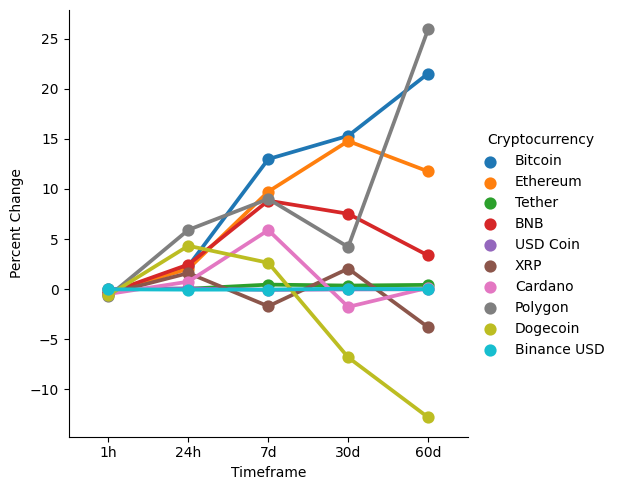

In [26]:
sns.catplot(x='Timeframe', y='Percent Change', hue='Cryptocurrency', data=df8, kind='point')

Observation based on the 60-day data:
    Polygon is the top performing currency for the past 60 days followed by Bitcoin.
    Tether and Binance currencies had negligible price actions.
    Dogecoin's value plummeted for more than -10% in the last 60 days.